### Histogram Equalization and Specification

In [1]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np
# Read the image in greyscale

def load_image(name):
  img = cv2.imread(name)  # Read as color (default)
  if len(img.shape) == 3:  # Convert only if it's a color image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  else:
    gray = img  # Already grayscale
  return gray

def show_image(image):
  plt.figure(figsize=(12,5))
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

def calculate_hist(gray):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(gray,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(gray.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()

def compare_matched_hist(src,dst,matched_src):
  images = [src,dst,matched_src]
  headings = ["Source","Destination","Matched Source"]
  n,m = len(images),2
  fig,ax = plt.subplots(n,m,figsize=(15,10))

  for i, (heading,img) in enumerate(zip(headings,images)):
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis('off')
    ax[i,0].set_title(heading)

    ax[i,1].hist(img.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  plt.show()

## Histogram Equalizing


In [2]:
gray = load_image('cat_pic.jpg')

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def histogram(img,bins):
  hist = np.zeros(bins)
  for i in range(len(img)):
    hist[img[i]]+=1
  return hist

def cumsum(hist):
  sum = [hist[0]]
  for i in range(1,len(hist)):
    sum.append(sum[-1]+hist[i])
  sum = np.array(sum)

  # normalisation
  sum = (sum - sum.min())/(sum.max() - sum.min())
  sum *= 255
  return sum

def my_equalizing_histograms(src):
  """
  :param src: input image
  :rtype: image 
  :return dest: histogram equalized src image
  """
  dest = None
  # [TODO] 
  img = np.asarray(src)
  img_flat = img.flatten()
  h = histogram(img_flat,256)
  c = cumsum(h).astype('uint8')
  dest = c[img_flat]
  dest = np.reshape(dest, img.shape)
  return dest

In [4]:
c = my_equalizing_histograms(gray)

Original Image


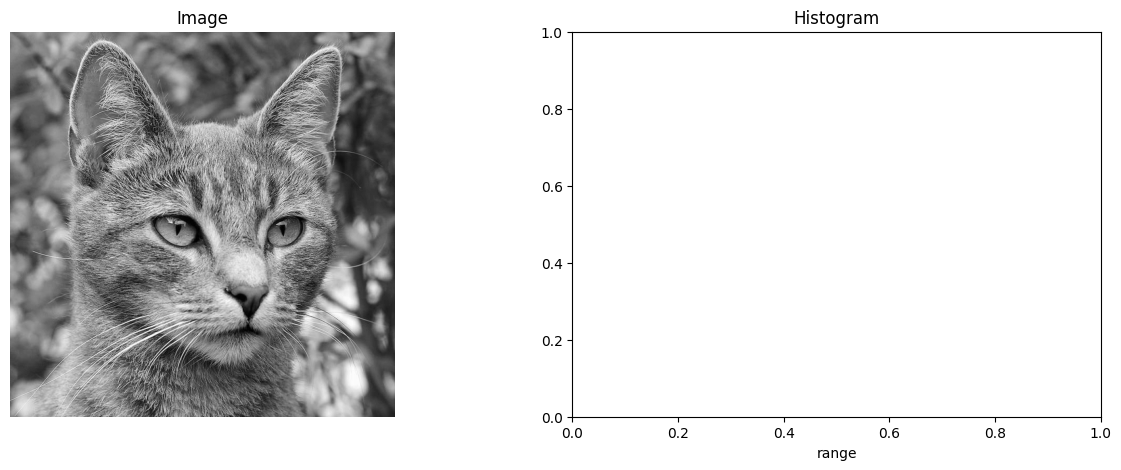

Equalization Image


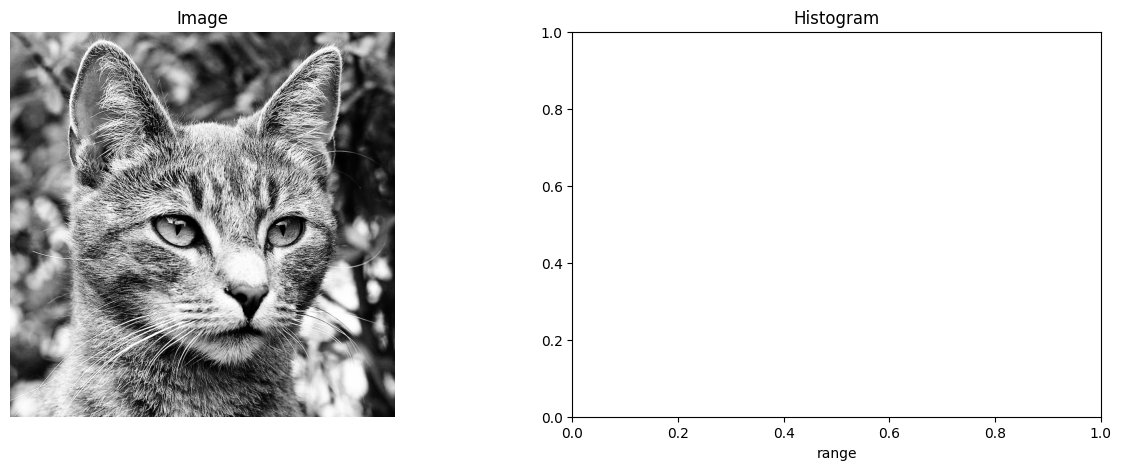

In [5]:
print("Original Image")
calculate_hist(gray)
print("Equalization Image")
my_equalization = calculate_hist(c)


## Histogram Matching

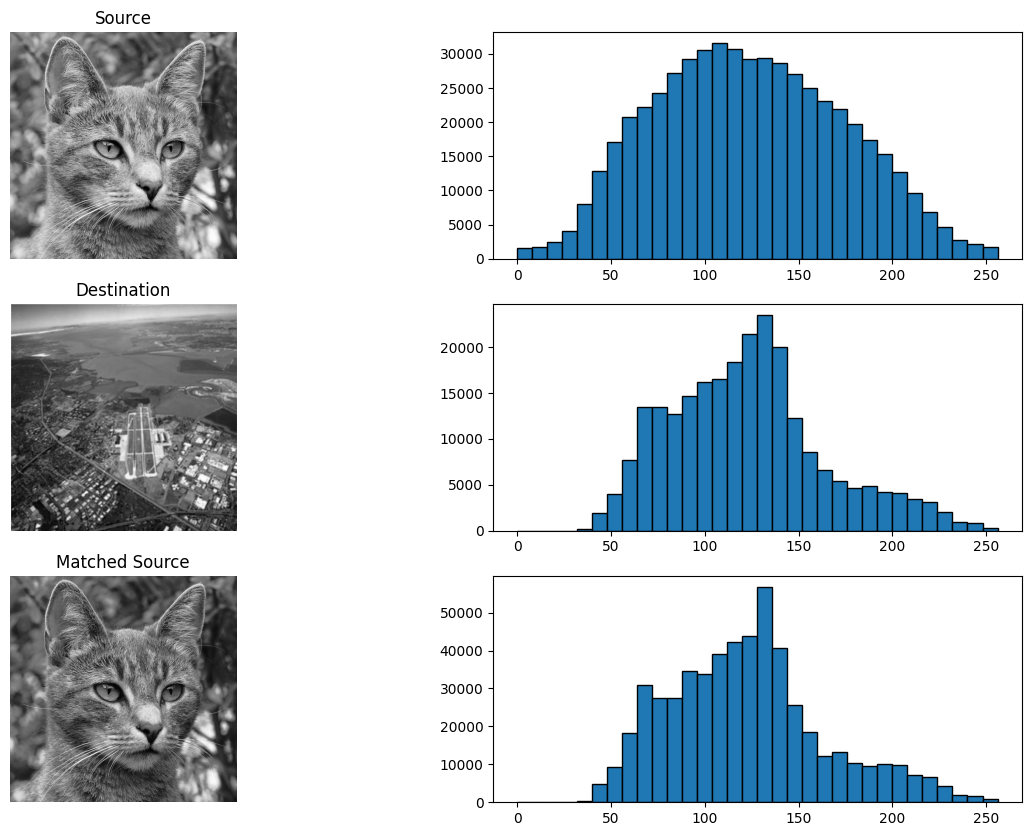

In [17]:
from skimage import exposure

src = load_image('cat_pic.jpg')
dst = load_image('pic_spec.jpg')


In [18]:
def find(arr, x):
  id = np.abs(arr-x).argmin()
  return id

def my_matching_histograms(src,dst):
  """
  :param src: input image
  :param dst: reference image
  :rtype: image 
  :return mathced_src: histogram matched src image
  """
  matched_src = None
  # [TODO] 
  img_shape = src.shape
  src_flat = src.flatten()
  dst_flat = dst.flatten()
  src_hist = histogram(src_flat,256)
  dst_hist = histogram(dst_flat,256)
  src_cs = cumsum(src_hist)
  dst_cs = cumsum(dst_hist)

  t = []

  for i in range(len(src_hist)):
    id = find(dst_cs, src_cs[i])
    t.append(id)
  matched_src = src_flat
  for i in range(len(matched_src)):
    matched_src[i] = t[matched_src[i]]
  return matched_src.reshape(img_shape)

In [20]:
matched = my_matching_histograms(src, dst)

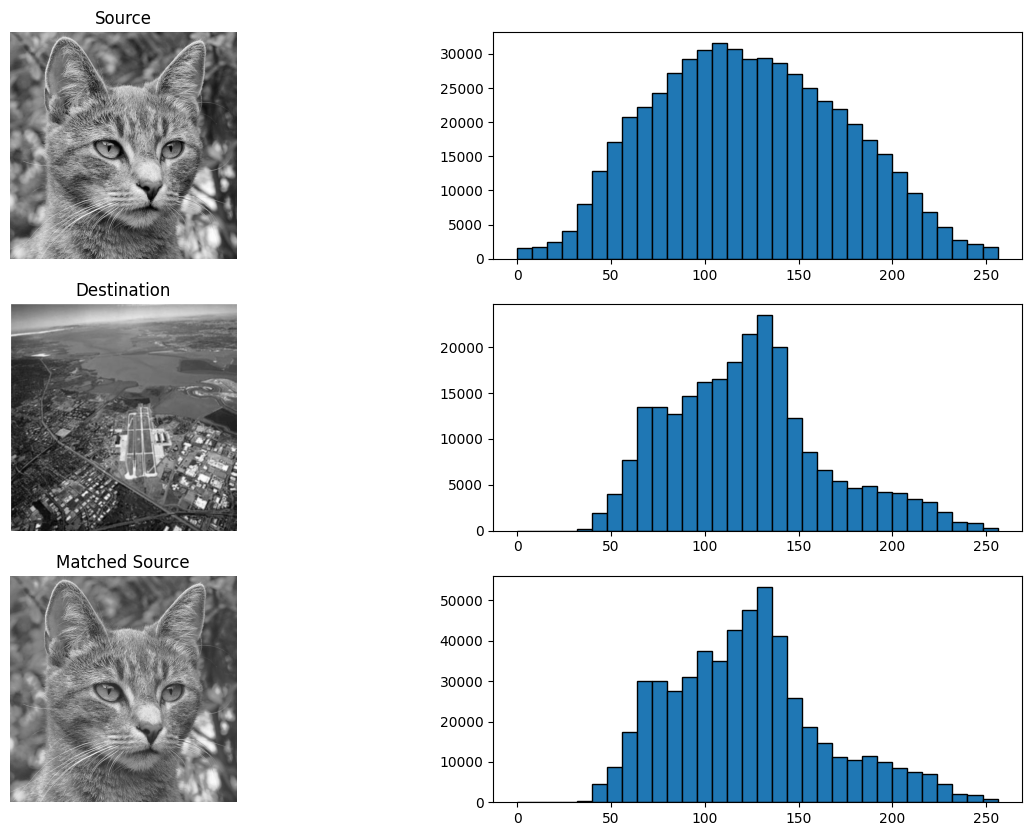

In [21]:
compare_matched_hist(src,dst,matched)